## True labels retrieval

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pht
import numpy as np
import pandas as pd
import os
import random
import torch
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
path="big_images/trafic_data"
label_path=os.path.join(path,"valid/labels")
image_path=os.path.join(path,"valid/images")

train_labels=[]
train_images=[]
for label in sorted(os.listdir(label_path)):
    f = open(os.path.join(label_path,label), "r")
    lines=f.readlines()
    r=[]
    for l in lines:
        r.append(list(map(float,l.split())))
    train_labels.append(r)
    #train_images.append(plt.imread(os.path.join(train_path,train)))
for image in sorted(os.listdir(image_path)):
    train_images.append(plt.imread(os.path.join(image_path,image)))
    
    
test_df=pd.DataFrame({"image":train_images,"labels":train_labels})



In [4]:
test_df

,image,labels
0,"[[[160, 158, 159], [219, 217, 218], [210, 208,...","[[5.0, 0.9015625, 0.7222222222222222, 0.192187..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[10.0, 0.5015625, 0.8305555555555556, 0.15312..."
2,"[[[165, 156, 157], [212, 203, 204], [201, 195,...","[[10.0, 0.58125, 0.8611111111111112, 0.0921875..."
3,"[[[23, 12, 28], [22, 11, 27], [21, 10, 26], [2...","[[5.0, 0.83125, 0.8138888888888889, 0.3328125,..."
4,"[[[102, 97, 120], [104, 99, 122], [94, 89, 111...","[[10.0, 0.125, 0.7416666666666667, 0.13125, 0...."
...,...,...
295,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[4.0, 0.409375, 0.4527777777777778, 0.178125,..."
296,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[18.0, 0.071875, 0.5, 0.14375, 0.238888888888..."
297,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[4.0, 0.46875, 0.4861111111111111, 0.1484375,..."
298,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[4.0, 0.503125, 0.5111111111111111, 0.1203125..."


In [5]:
test_df["image"]=test_df["image"].apply(lambda x : x/255)

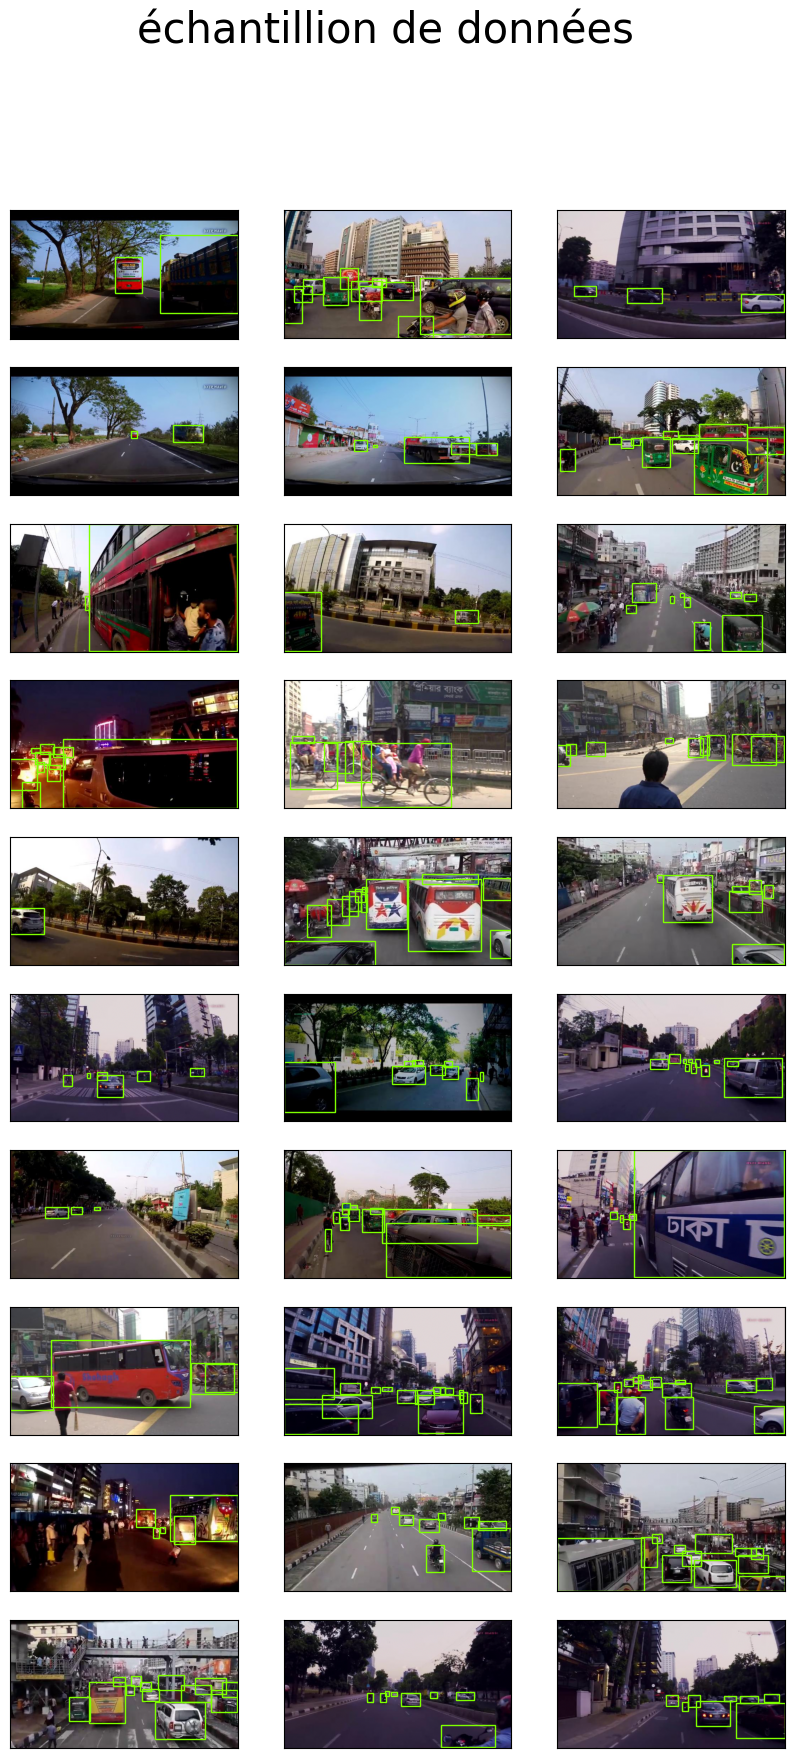

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
plot_images= random.choices(np.arange(len(test_df)),k=10*3)
for i,ax in enumerate(axes.flat):
    ax.imshow(test_df["image"][plot_images[i]])
    lbls=test_df["labels"][plot_images[i]]
    #cl,x,y,w,h=test_df["labels"][plot_images[i]]
    for box in lbls:
        img_w=test_df["image"][plot_images[i]].shape[1]
        img_h=test_df["image"][plot_images[i]].shape[0]
        cl,x,y,w,h=box
        x_min = int((x - w/2) * img_w)
        y_min = int((y - h/2) * img_h)
        #ax.hlines(y_min,x_min,x_min+w,color="green")
        rect=pht.Rectangle((x_min,y_min),w*img_w,h*img_h,facecolor='none',edgecolor="chartreuse")
        ax.add_patch(rect)
        #cv2.rectangle(ax, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
            
    #ax.set_title(data_df["label"][plot_images[i]])
fig.suptitle("échantillion de données",fontsize=30)
plt.savefig("captures/true.png")

In [42]:
def create_true_image(image,labels):
    img_w=image.shape[1]
    img_h=image.shape[0]
    res_image=np.zeros((img_h,img_w))
    for box in labels:
        cl,x,y,w,h=box
        x_min = int((x - w/2) * img_w)
        y_min = int((y - h/2) * img_h)
        for y in range(y_min,y_min+int(h*img_h)):
            for x in range(x_min,x_min+int(w*img_w)):
                res_image[y][x]=1
    return res_image

In [34]:
r=create_true_image(test_df["image"][0],test_df["labels"][0])

ok
ok
ok


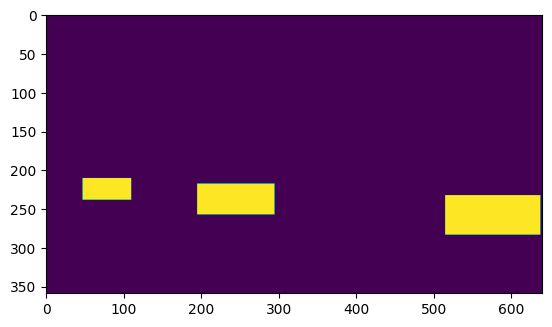

In [35]:
plt.imshow(r)

In [52]:
res=[]
for i in range(len(test_df)) :
    data=test_df.iloc[i]
    res.append(create_true_image(data["image"],data["labels"]))
res_df=pd.DataFrame()
res_df["mask"]=res

In [53]:
res_df.to_pickle("results/true.pkl")